In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [3]:
# Question: Load the given dataset

df = pd.read_csv("HR_Data.csv")

# Display first few rows of the dataset
print("URK22CS7048")
print("Dataset Preview:\n", df.head())


URK22CS7048
Dataset Preview:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.72             0.87               5                   223   
2                0.37             0.52               2                   159   
3                0.41             0.50               2                   153   
4                0.10             0.77               6                   247   

   time_spend_company  Work_accident  left  promotion_last_5years Departments  \
0                   3              0     1                      0       sales   
1                   5              0     1                      0       sales   
2                   3              0     1                      0       sales   
3                   3              0     1                      0       sales   
4                   4              0     1                      0       sales   

  

In [4]:
# Question: Conduct the pre-processing steps, if required

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Check for missing values
print("URK22CS7048")
print("Missing values in each column:\n", df_numeric.isnull().sum())

# Normalize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)
print("Data Pre-processing Completed!")


URK22CS7048
Missing values in each column:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dtype: int64
Data Pre-processing Completed!


In [5]:
# Question: Remove the target variable, if available in the dataset

# Remove target variable if it exists
if 'target' in df_numeric.columns:
    df_numeric.drop(columns=['target'], inplace=True)
print("URK22CS7048")
print("Dataset after removing target variable:\n", df_numeric.head())


URK22CS7048
Dataset after removing target variable:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.72             0.87               5                   223   
2                0.37             0.52               2                   159   
3                0.41             0.50               2                   153   
4                0.10             0.77               6                   247   

   time_spend_company  Work_accident  left  promotion_last_5years  
0                   3              0     1                      0  
1                   5              0     1                      0  
2                   3              0     1                      0  
3                   3              0     1                      0  
4                   4              0     1                      0  


URK22CS7048


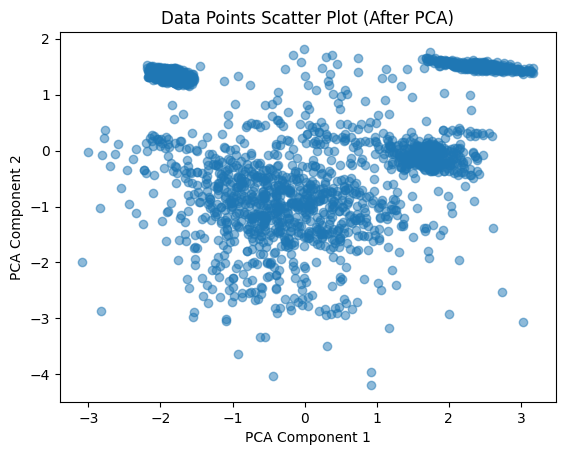

In [6]:
# Question: Plot the datapoints using scatter plots

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
print("URK22CS7048")
# Scatter plot of the dataset
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.title("Data Points Scatter Plot (After PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [7]:
# Question: Apply SOM clustering approach and cluster the datapoints into N number of clusters.

# Define the SOM grid size
som_x, som_y = 5, 5  # You can adjust grid size based on dataset size
som = MiniSom(som_x, som_y, data_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize weights
som.random_weights_init(data_scaled)

# Train SOM
som.train_random(data_scaled, 1000)  # Training iterations

# Get cluster labels
winner_coordinates = np.array([som.winner(x) for x in data_scaled])
cluster_labels = np.ravel_multi_index(winner_coordinates.T, (som_x, som_y))
print("URK22CS7048")

print("SOM Clustering Completed!")


URK22CS7048
SOM Clustering Completed!


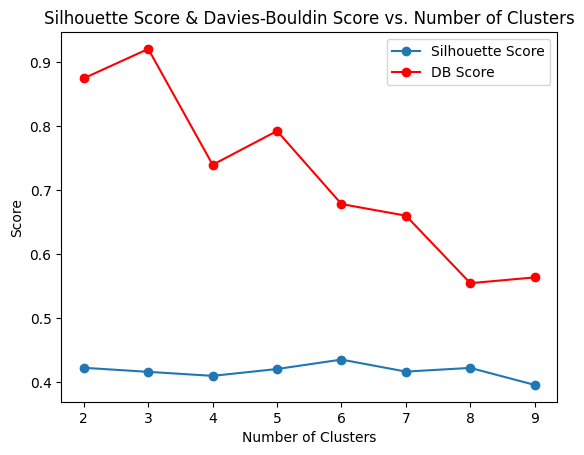

URK22CS7048
Optimal Number of Clusters: 6


In [8]:
# Question: Determine the optimal number of clusters.

# Apply K-Means on SOM weight vectors
som_weights = som.get_weights().reshape(-1, data_scaled.shape[1])

silhouette_scores = []
db_scores = []
cluster_range = range(2, 10)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(som_weights)

    silhouette_scores.append(silhouette_score(som_weights, labels))
    db_scores.append(davies_bouldin_score(som_weights, labels))

# Plot silhouette scores
plt.plot(cluster_range, silhouette_scores, marker="o", label="Silhouette Score")
plt.plot(cluster_range, db_scores, marker="o", label="DB Score", color="red")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.title("Silhouette Score & Davies-Bouldin Score vs. Number of Clusters")
plt.show()

# Optimal number of clusters (based on best silhouette score)
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print("URK22CS7048")
print(f"Optimal Number of Clusters: {optimal_clusters}")


URK22CS7048


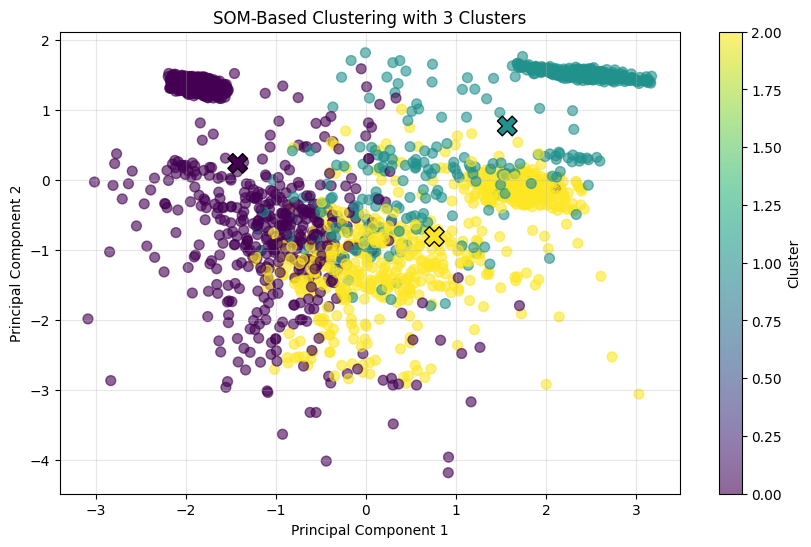


Cluster Distribution:
Cluster 1: 866 data points (43.26%)
Cluster 2: 455 data points (22.73%)
Cluster 3: 681 data points (34.02%)

Cluster Centroids in PCA space:
Cluster 1 centroid: [-1.42206514  0.23417513]
Cluster 2 centroid: [1.56912609 0.76943547]
Cluster 3 centroid: [ 0.75999419 -0.81187782]


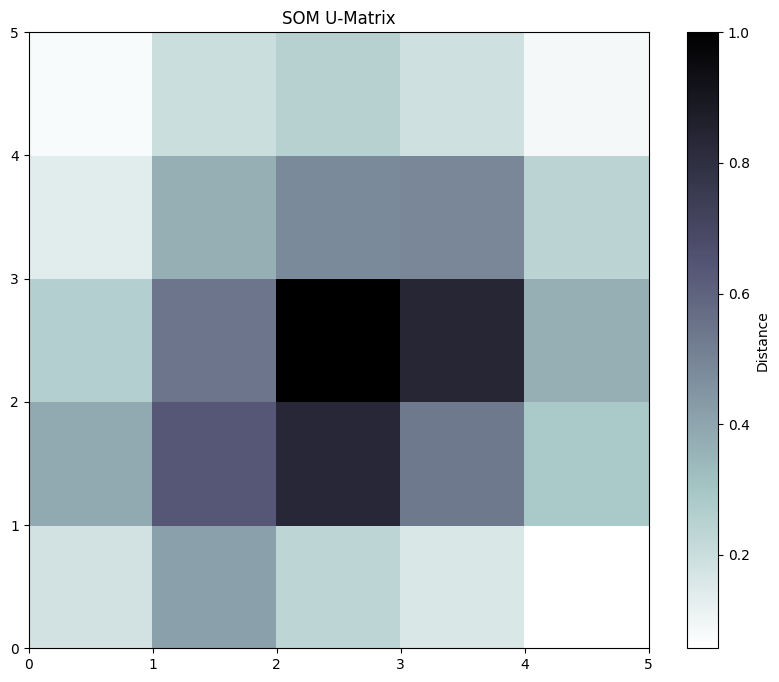

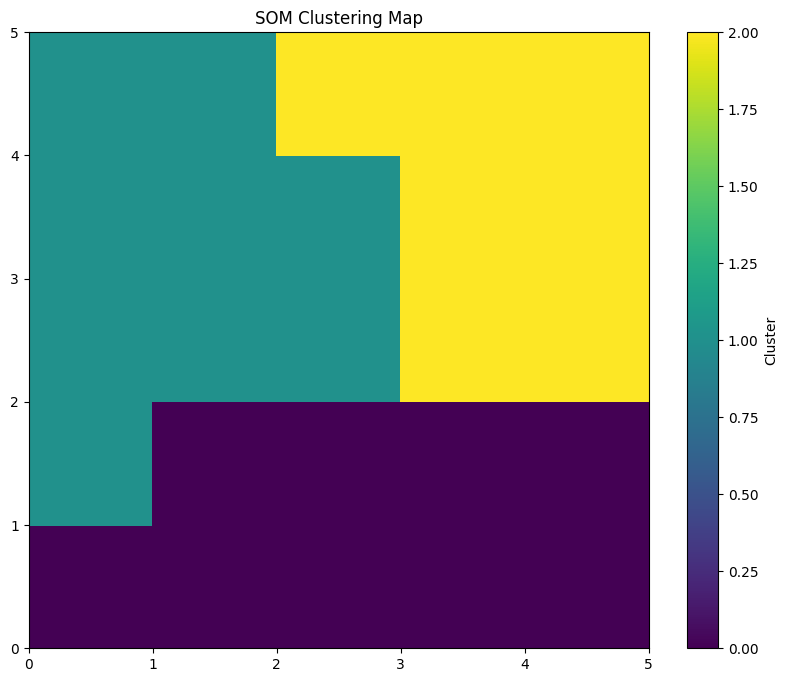

In [15]:
# Question: Print and plot the cluster centroids and cluster labels
print("URK22CS7048")

# Use the already loaded DataFrame (df) as your data source
data = df.select_dtypes(include=[np.number]).dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Define SOM parameters
som_shape = (5, 5)  # 5x5 grid of neurons
input_len = scaled_data.shape[1]
    
# Initialize and train SOM
som = MiniSom(som_shape[0], som_shape[1], input_len, sigma=1.0, learning_rate=0.5, random_seed=42)
som.train_random(scaled_data, 1000)  # Train for 1000 iterations

# Extract weights for all neurons
som_weights = np.array([som._weights[i, j] for i in range(som._weights.shape[0]) 
                        for j in range(som._weights.shape[1])])

# Define optimal number of clusters
optimal_clusters = 3  # You can adjust this based on your analysis

# Map data points to SOM neurons and get their cluster labels
map_to_bmu = np.zeros(data_pca.shape[0], dtype=int)
for i, x in enumerate(scaled_data):
    bmu_idx = som.winner(x)
    # Convert 2D index to 1D index
    if isinstance(bmu_idx, tuple):
        bmu_idx = bmu_idx[0] * som.get_weights().shape[1] + bmu_idx[1]
    map_to_bmu[i] = bmu_idx

# Get cluster labels for each data point
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
som_cluster_labels = kmeans.fit_predict(som_weights)
data_cluster_labels = np.array([som_cluster_labels[bmu] for bmu in map_to_bmu])

# Visualize the clusters in PCA space
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], 
                    c=data_cluster_labels, cmap="viridis", 
                    alpha=0.6, s=50)

# Calculate and plot centroids
centroids = np.zeros((optimal_clusters, 2))
for i in range(optimal_clusters):
    mask = data_cluster_labels == i
    if np.any(mask):
        centroids[i] = np.mean(data_pca[mask], axis=0)
        
plt.scatter(centroids[:, 0], centroids[:, 1], 
           c=range(optimal_clusters), cmap="viridis",
           marker='X', s=200, edgecolors='black')

plt.colorbar(scatter, label='Cluster')
plt.title(f"SOM-Based Clustering with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.3)
plt.show()

# Print cluster statistics
print("\nCluster Distribution:")
for i in range(optimal_clusters):
    cluster_size = np.sum(data_cluster_labels == i)
    print(f"Cluster {i+1}: {cluster_size} data points ({cluster_size/len(data_cluster_labels)*100:.2f}%)")

# Print centroids 
print("\nCluster Centroids in PCA space:")
for i in range(optimal_clusters):
    print(f"Cluster {i+1} centroid: {centroids[i]}")

# Visualize the SOM U-Matrix (optional)
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar(label='Distance')
plt.title('SOM U-Matrix')
plt.show()

# Visualize SOM with cluster labels
plt.figure(figsize=(10, 8))
# Get cluster for each SOM neuron
som_neuron_clusters = np.zeros((som_shape[0], som_shape[1]))
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        neuron_idx = i * som_shape[1] + j
        som_neuron_clusters[i, j] = som_cluster_labels[neuron_idx]

plt.pcolor(som_neuron_clusters.T, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('SOM Clustering Map')
plt.show()